<a href="https://colab.research.google.com/github/anfansler/IMSE641/blob/main/Layer_173.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Alexandria Fansler A9 Final Project.ipynb

---



# layer 173 x bar and r charts

In [ ]:
# Importing Necessary Libraries
import numpy as np
from skimage import data, io, filters
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from PIL import Image 
# to validate iid, we do a QQ plot, e.g. Normal test shown below
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sc
import statsmodels.graphics.gofplots as sm
import statistics
from matplotlib.ticker import PercentFormatter
import pandas as pd
import statistics
plt.style.use('seaborn-colorblind')

<ipython-input-2-cbfa3fe52fdf>:20: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-colorblind')


In [ ]:
from pandas.io.formats.info import DataFrameInfoPrinter
# to read in the data make sure that you use the raw format in Github
# the following input statement is needed to use pandas dataframe feature
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/anfansler/IMSE641/main/243_layers_w_defect_641.csv', sep=',',na_values='.')
dataAll=[data[['s_d2','s_d3','s_d4','s_d5','s_d6','s_d7','s_d8','s_d9','s_d10',	's_d12', 's_d16',	's_d19',	's_d20',	's_d23',	's_d24',	's_d26',	's_d28']]]
data 

data173= [data[['s_d2','s_d3','s_d4','s_d5','s_d6','s_d7','s_d8','s_d9','s_d10']][data['layer'] < 173]]
data173

[     s_d2  s_d3  s_d4  s_d5  s_d6  s_d7  s_d8  s_d9  s_d10
 0       0     0     0     0     0     0     0     0      2
 1     383   394   372   329   330   338   298   339    409
 2     260   212   214   211   170   231   223   272    216
 3     298   288   252   260   244   328   284   375    269
 4     309   252   255   264   226   295   257   334    246
 ..    ...   ...   ...   ...   ...   ...   ...   ...    ...
 168   368   351   326   335   285   364   307   394    340
 169   404   313   339   327   319   414   312   427    368
 170   408   369   336   324   309   396   308   371    331
 171   422   348   368   323   282   383   345   401    346
 172   452   377   355   356   377   397   312   425    401
 
 [173 rows x 9 columns]]

In [ ]:
x=np.reshape(data173, (173,9))
x

array([[  0,   0,   0, ...,   0,   0,   2],
       [383, 394, 372, ..., 298, 339, 409],
       [260, 212, 214, ..., 223, 272, 216],
       ...,
       [408, 369, 336, ..., 308, 371, 331],
       [422, 348, 368, ..., 345, 401, 346],
       [452, 377, 355, ..., 312, 425, 401]])

In [ ]:
# Define list variable for groups means
x_bar = []

# Define list variable for groups ranges
r = [] 

In [ ]:
# Get and append groups means and ranges
# if you run this cell multiple times, then the data series will be repeated
for group in x:
    x_bar.append(group.mean())
    r.append(group.max() - group.min())
#print(x_bar)
#print(r)
m=len(x_bar)
print('points in x, ', m)

points in x,  173


[Text(0.5, 0, 'Group'), Text(0, 0.5, 'Range')]

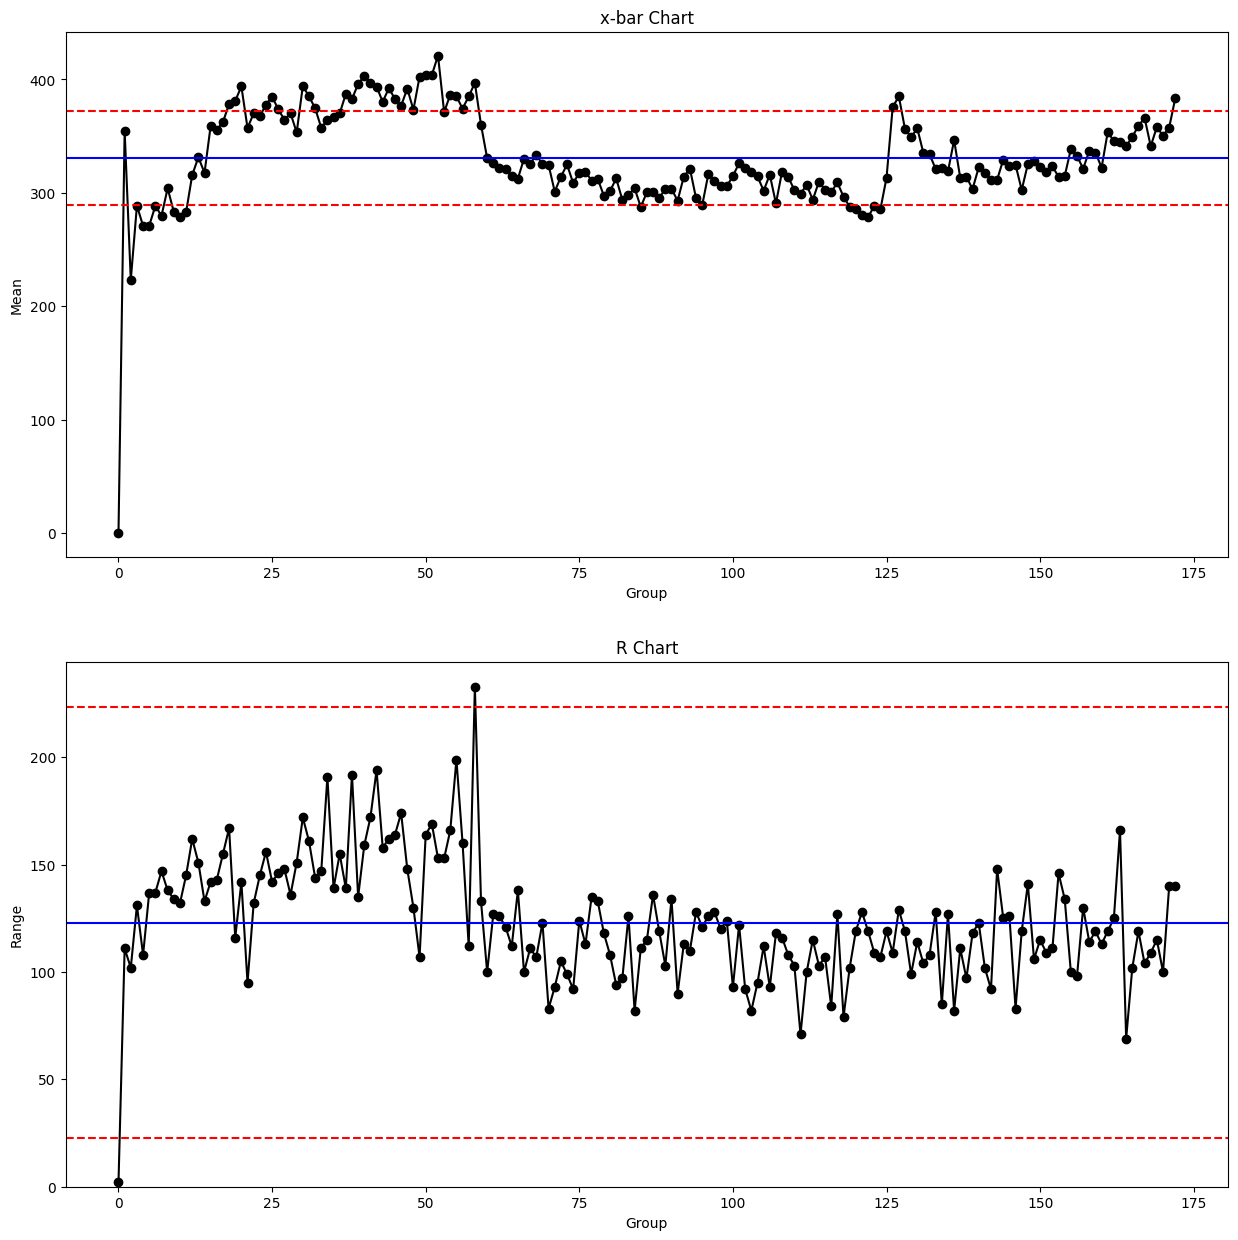

In [ ]:
# Plot x-bar and R charts
fig, axs = plt.subplots(2, figsize=(15,15))

# x-bar chart
# Chart parameters A2, D3, and D4 see the ref for other sample size
A2=0.337 #n=9
D3=0.184 #n=9
D4=1.816 #n=9

axs[0].plot(x_bar, linestyle='-', marker='o', color='black')
axs[0].axhline((statistics.mean(x_bar)+A2*statistics.mean(r)), color='red', linestyle='dashed')
axs[0].axhline((statistics.mean(x_bar)-A2*statistics.mean(r)), color='red', linestyle='dashed')
axs[0].axhline((statistics.mean(x_bar)), color='blue')
axs[0].set_title('x-bar Chart')
axs[0].set(xlabel='Group', ylabel='Mean')

# R chart
axs[1].plot(r, linestyle='-', marker='o', color='black')
axs[1].axhline((D4*statistics.mean(r)), color='red', linestyle='dashed')
axs[1].axhline((D3*statistics.mean(r)), color='red', linestyle='dashed')
axs[1].axhline((statistics.mean(r)), color='blue')
axs[1].set_ylim(bottom=0)
axs[1].set_title('R Chart')
axs[1].set(xlabel='Group', ylabel='Range')

In [ ]:
# Validate points out of control limits for x-bar chart
i = 0
control = True
for group in x_bar:
    if group > statistics.mean(x_bar)+A2*statistics.mean(r) or group < statistics.mean(x_bar)-A2*statistics.mean(r):
        print('Group', i, 'out of mean control limits!')
        control = False
    i += 1
if control == True:
    print('All points within control limits.')

Group 0 out of mean control limits!
Group 2 out of mean control limits!
Group 3 out of mean control limits!
Group 4 out of mean control limits!
Group 5 out of mean control limits!
Group 6 out of mean control limits!
Group 7 out of mean control limits!
Group 9 out of mean control limits!
Group 10 out of mean control limits!
Group 11 out of mean control limits!
Group 18 out of mean control limits!
Group 19 out of mean control limits!
Group 20 out of mean control limits!
Group 24 out of mean control limits!
Group 25 out of mean control limits!
Group 26 out of mean control limits!
Group 30 out of mean control limits!
Group 31 out of mean control limits!
Group 32 out of mean control limits!
Group 37 out of mean control limits!
Group 38 out of mean control limits!
Group 39 out of mean control limits!
Group 40 out of mean control limits!
Group 41 out of mean control limits!
Group 42 out of mean control limits!
Group 43 out of mean control limits!
Group 44 out of mean control limits!
Group 45 

In [ ]:
# Validate points out of control limits for R chart
i = 0
control = True
for group in r:
    if group > D4*statistics.mean(r):
        print('Group', i, 'out of range cotrol limits!')
        control = False
    i += 1
if control == True:
    print('All points within control limits.')

Group 58 out of range cotrol limits!


# CUSUM layer 100

In [ ]:
# np flattern() function is used to convert a 2D matrix into 1D vector
# n=1 is use for CUSUM chart
x1=x.flatten()

In [ ]:
# process mean is computed assuming it is stationary
x1.mean()

330.9621066152858

In [ ]:
# this class define how tabular CUSUM chart is plotted
# input: h, k, process mean mu & process standard deviation sigma & delta
# h is unit away from the center line; H=h * sigma
# k is delta/2; K= k * sigma
# delta is the mu1 - mu0, the shift magnitude to be detected
# reference K= (delta/2)*sigma
class CUSUM:
    def fit(self,data, h, k, mu, sigma):
        
        self.X     = data
        self.cplus     = np.zeros(len(data))
        self.cminus     = np.zeros(len(data))
        self.H = h * sigma
        self.K = k * sigma
        self.mean  = mu
        self.sigma = sigma
        self.cplus[0]  = 0
        self.cminus[0] = 0
        for i in range(1,len(self.X)):
            self.cplus[i] = max(0, self.X[i] -(self.mean+self.K) + self.cplus[i-1]) 
            self.cminus[i] = max(0, (self.mean-self.K) - self.X[i] + self.cminus[i-1])

    def  ControlChart(self):
        # all CUSUM parameters will be imported from def fit
        ucl = np.zeros(len(self.X))
        lcl = np.zeros(len(self.X))
        # I   = np.arange(1,len(self.X)+1)
        
        for i in range(len(self.X)):
            ucl[i] = self.H
            lcl[i] = -1*self.H
              
        plt.figure(figsize=(15,5))
        plt.plot(self.cplus,marker="o",color="k",label="$C+$")
        plt.plot(-1*self.cminus,marker="x",color="k",label="$C-$")
        plt.plot(np.zeros(len(self.X)),color="k",alpha=0.35)
        plt.plot(ucl,color="r",label="UCL {}".format(ucl[len(ucl)-1].round(2)))
        plt.plot(lcl,color="r",label="LCL {}".format(lcl[len(lcl)-1].round(2)))
        plt.title("CUSUM Conrol Chart")
        plt.legend(loc="upper left")
        plt.show()

In [ ]:
# Define list variable for groups means
x_bar = []

# Define list variable for groups standard deviation
s = []

In [ ]:
# Get and append groups means and ranges
# if you run this cell multiple times, then the data series will be repeated
# since append is used here, if this block of codes is executed twice, m is doubled
for group in x:
    x_bar.append(group.mean())
    s.append(np.std(group))

m=len(x_bar)
print('points in plotting dataset, ', m)

points in plotting dataset,  173


In [ ]:
# use the phase I data to compute mean and sigma
# S-bar is used here but you can also use R-bar or MR for sigma estimate
#c4 is 0.9727 for n=5
c4=0.9727
x_bar_bar=statistics.mean(x_bar)
s_bar=statistics.mean(s)
sigma_hat=s_bar/c4
print('process mean is, ', x_bar_bar)
print('process standard deviation is, ', sigma_hat)

process mean is,  330.9621066152858
process standard deviation is,  41.333588399232426


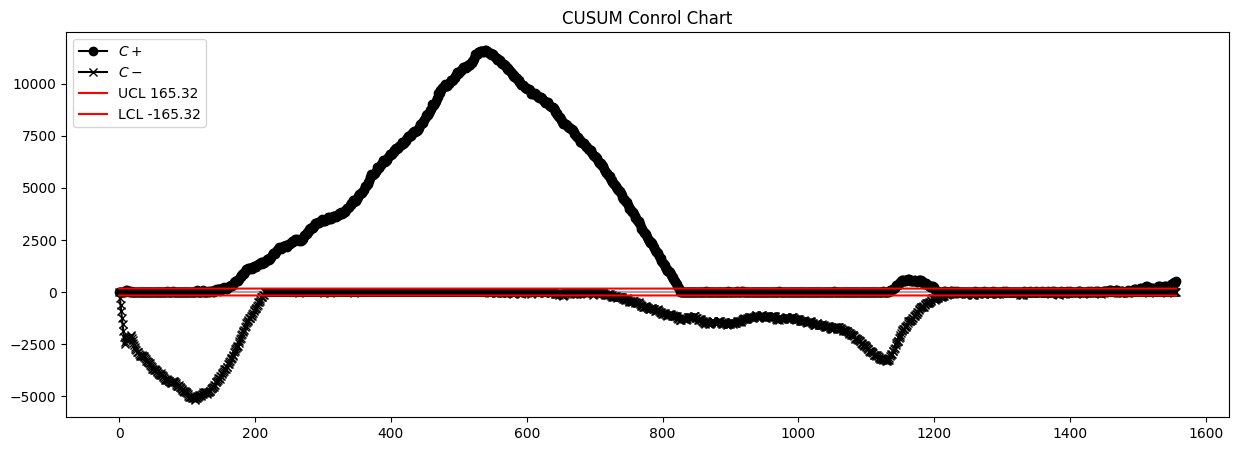

In [ ]:
# This chart is for either Phase I or Phase II assuming all mean and sigma are estimated
# In this block, only Phase I data is plotted
# CUSUM chart parameters are K, mu, sigma
# if mu and sigma are known or can be estimated, the above estimations using x-bar and S are not necessary
chart = CUSUM()
chart.fit(data=x1, h=4, k=0.5, mu=330.96, sigma=41.33)
chart.ControlChart()